In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/raw/dataset.csv")


In [2]:
df.shape
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2721 entries, 0 to 2720
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                2721 non-null   object 
 1   Year                  2721 non-null   int64  
 2   Median (2021 prices)  2721 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 63.9+ KB


,Entity,Year,Median (2021 prices)
0,Albania,1996,7.419331
1,Albania,2002,7.117155
2,Albania,2005,8.300112
3,Albania,2008,8.939034
4,Albania,2012,8.768968


In [3]:
df.isnull().sum()


Entity                  0
Year                    0
Median (2021 prices)    0
dtype: int64

<Axes: >

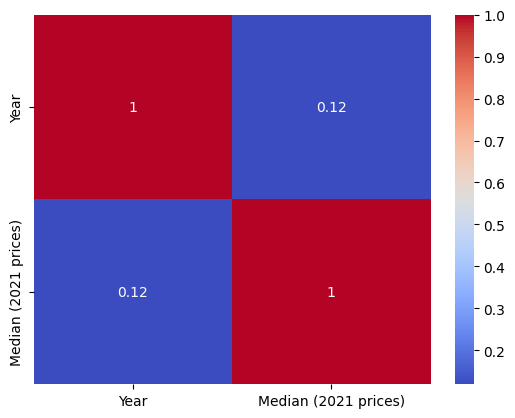

In [5]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")


In [30]:
df=pd.read_csv("../data/raw/bmw.csv");

In [31]:
print(df.head())

       model  year    price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200.0    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000.0    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000.0    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750.0    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500.0    Automatic    39554   Diesel  160  50.4   

   engineSize  
0         2.0  
1         2.0  
2         3.0  
3         1.5  
4         3.0  


In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10780 non-null  float64
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10779 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 758.2+ KB
None


In [33]:
print(df.describe(include='all')) 

            model          year          price transmission        mileage  \
count       10781  10781.000000   10780.000000        10781   10781.000000   
unique         24           NaN            NaN            3            NaN   
top      3 Series           NaN            NaN    Semi-Auto            NaN   
freq         2443           NaN            NaN         4666            NaN   
mean          NaN   2017.078935   22734.645733          NaN   25496.986550   
std           NaN      2.349038   11415.335246          NaN   25143.192559   
min           NaN   1996.000000    1200.000000          NaN       1.000000   
25%           NaN   2016.000000   14950.000000          NaN    5529.000000   
50%           NaN   2017.000000   20466.000000          NaN   18347.000000   
75%           NaN   2019.000000   27940.000000          NaN   38206.000000   
max           NaN   2020.000000  123456.000000          NaN  214000.000000   

       fuelType           tax           mpg    engineSize  
cou

In [34]:
print(df.isnull().sum())



model           0
year            0
price           1
transmission    0
mileage         0
fuelType        2
tax             0
mpg             0
engineSize      0
dtype: int64


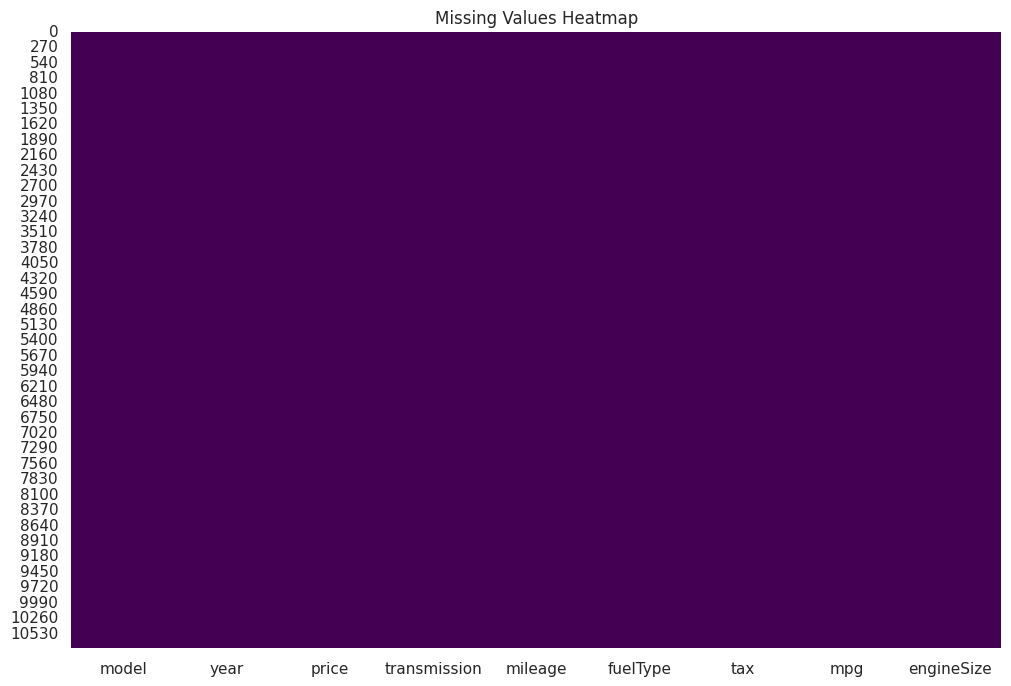

In [35]:
sns.set(style="whitegrid")

plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [36]:
print(df.duplicated().sum())

117


In [37]:
# Standardize all column names
df.columns = df.columns.str.strip()           # remove spaces
df.columns = df.columns.str.lower()           # lowercase
df.columns = df.columns.str.replace(' ', '_') # replace spaces with underscores

print(df.columns.tolist())


['model', 'year', 'price', 'transmission', 'mileage', 'fueltype', 'tax', 'mpg', 'enginesize']


In [38]:
numerical_cols = ['price', 'mileage', 'tax', 'mpg', 'enginesize']


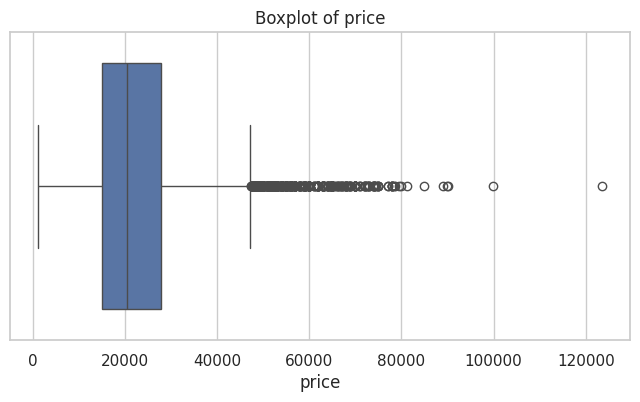

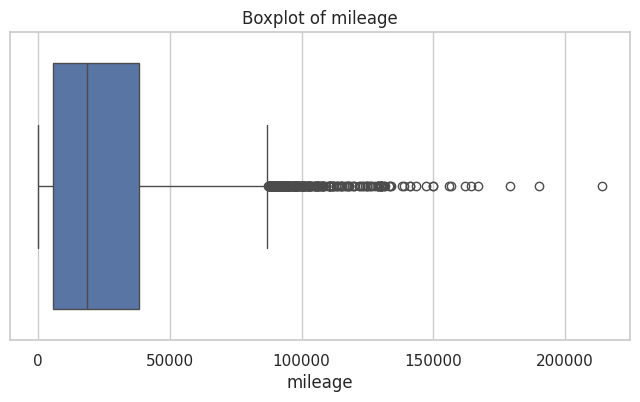

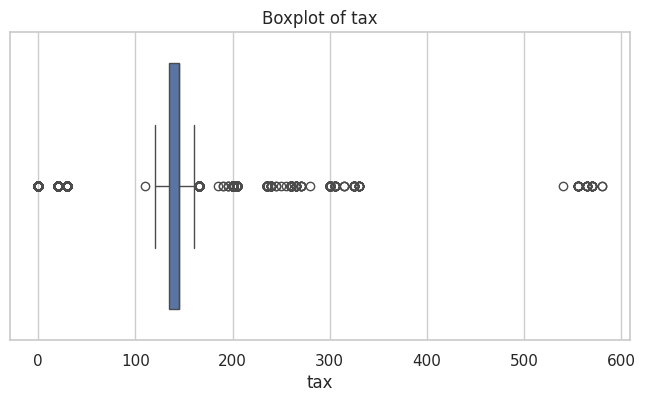

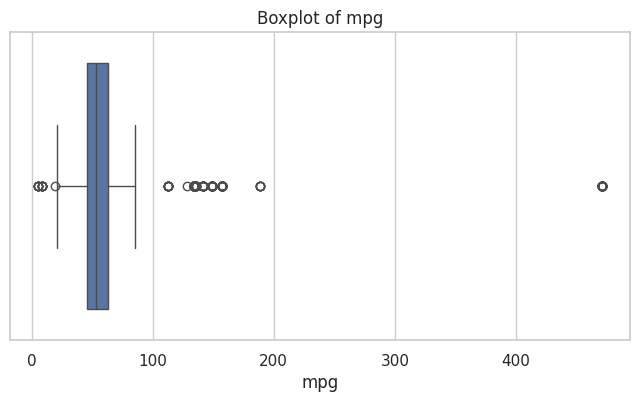

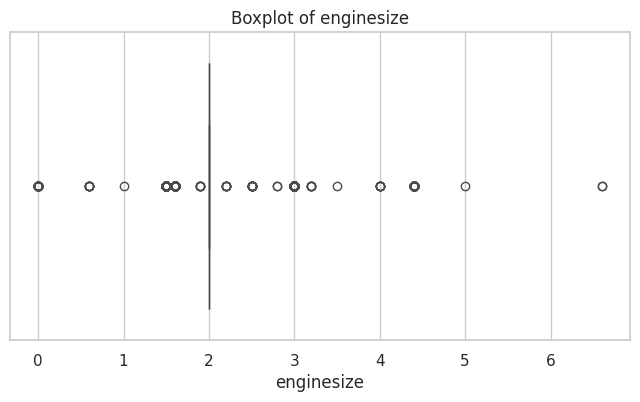

In [41]:
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [40]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


price: 484 outliers
mileage: 296 outliers
tax: 2733 outliers
mpg: 275 outliers
enginesize: 4206 outliers


In [42]:
# Example: remove price outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df_clean = df[(df['price'] >= lower) & (df['price'] <= upper)]


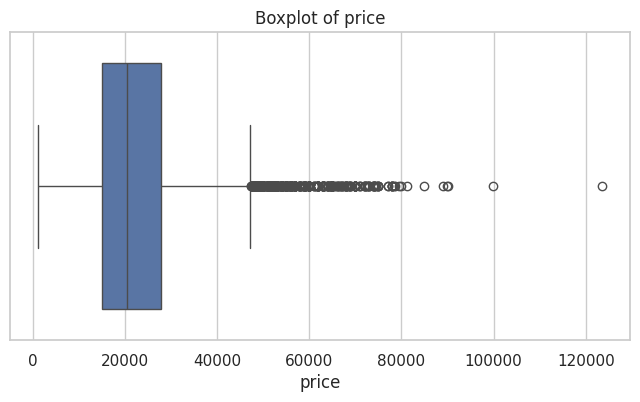

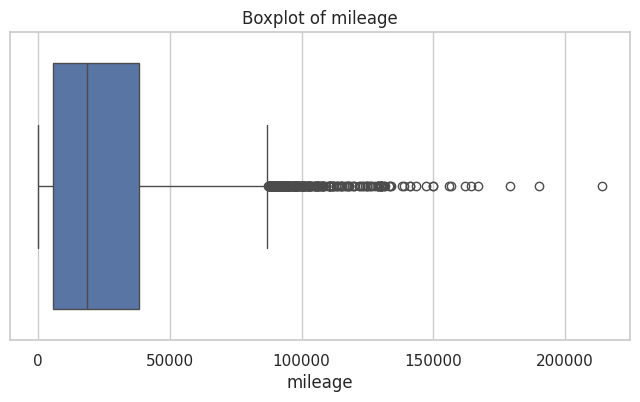

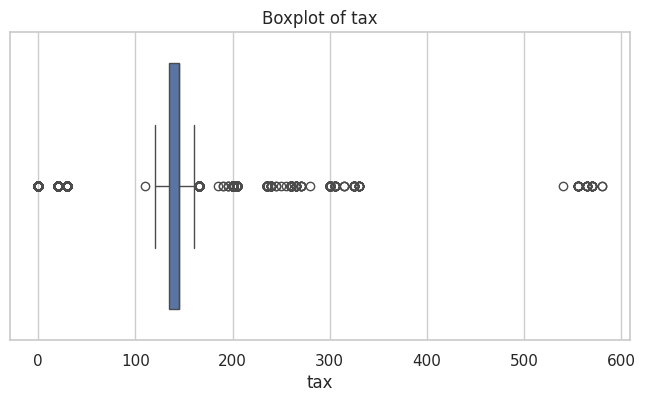

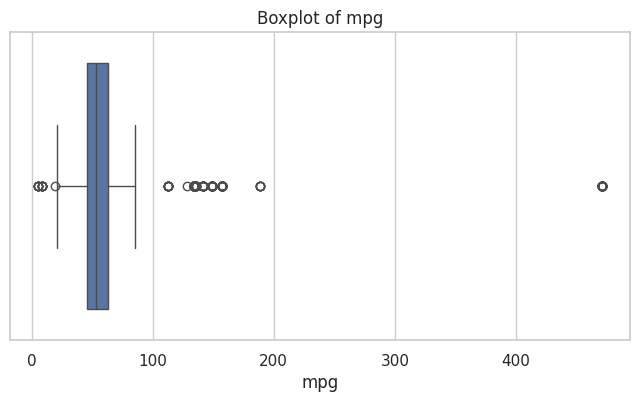

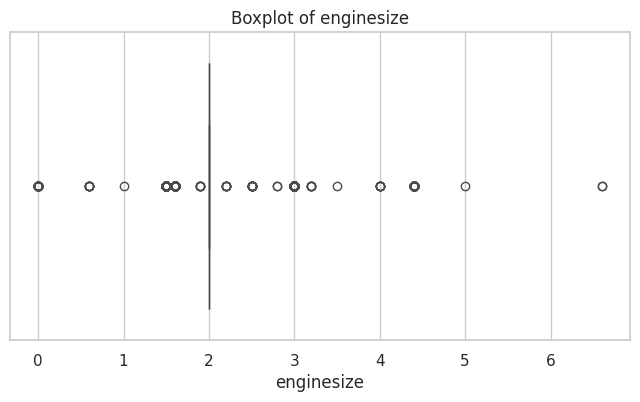

In [44]:
# Example: remove price outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df_clean = df[(df['price'] >= lower) & (df['price'] <= upper)]
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [47]:
processed_path = "../data/processed/bmw_final.csv"

# Load the data
df = pd.read_csv(processed_path)

# Quick look
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4726 entries, 0 to 4725
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4726 non-null   object 
 1   year          4726 non-null   int64  
 2   price         4726 non-null   float64
 3   transmission  4726 non-null   object 
 4   mileage       4726 non-null   int64  
 5   fuelType      4726 non-null   object 
 6   tax           4726 non-null   int64  
 7   mpg           4726 non-null   float64
 8   engineSize    4726 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 332.4+ KB


,year,price,mileage,tax,mpg,engineSize
count,4726.000000,4726.000000,4726.000000,4726.000000,4726.000000,4726.0
mean,2017.794964,23042.382776,18382.792425,144.241430,54.331951,2.0
std,1.802193,6939.137642,19392.846025,8.115639,8.327803,0.0
min,2012.000000,5299.000000,1.000000,120.000000,31.400000,2.0
25%,2017.000000,17882.500000,4064.250000,145.000000,48.700000,2.0
50%,2019.000000,22774.000000,10144.000000,145.000000,54.300000,2.0
75%,2019.000000,27991.750000,28170.000000,145.000000,60.100000,2.0
max,2020.000000,44991.000000,86000.000000,165.000000,74.300000,2.0
